# Recurrent Neural Networks

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [11]:
df = pd.read_csv('cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083
...,...,...,...
308,Sep-2016,45528702,44534797
309,Oct-2016,44770113,45061618
310,Nov-2016,46285062,45141762
311,Dec-2016,50016137,44943929


In [12]:
from pandas.tseries.offsets import MonthEnd

In [13]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


<Axes: xlabel='Adjustments'>

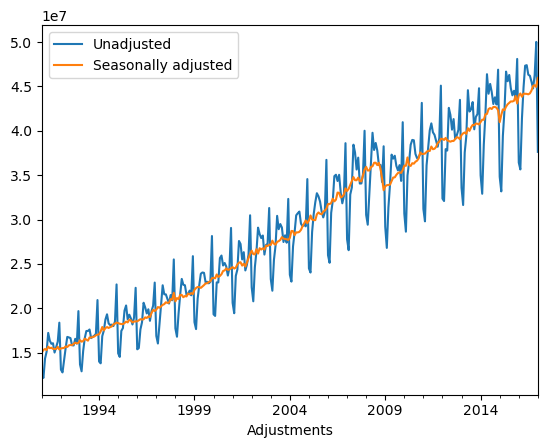

In [14]:
df.plot()

In [15]:
split_date = pd.Timestamp('01-01-2011')

In [16]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

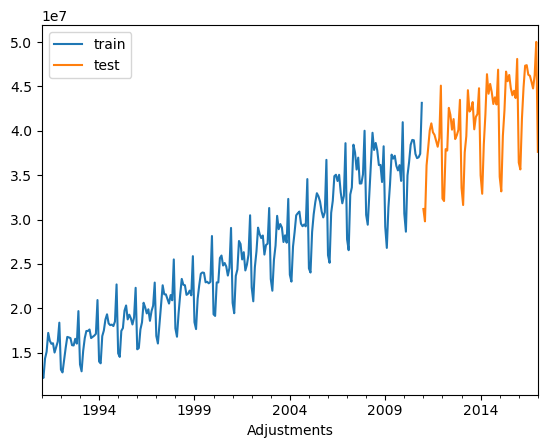

In [17]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [18]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [19]:
#train_sc

In [21]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully connected predictor

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [27]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          callbacks=[early_stop])

Epoch 1/200

120/120 [==============================] - 1s 1ms/step - loss: 0.0764
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 8/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 9/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 10/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 11/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 12/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 13/200

In [28]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


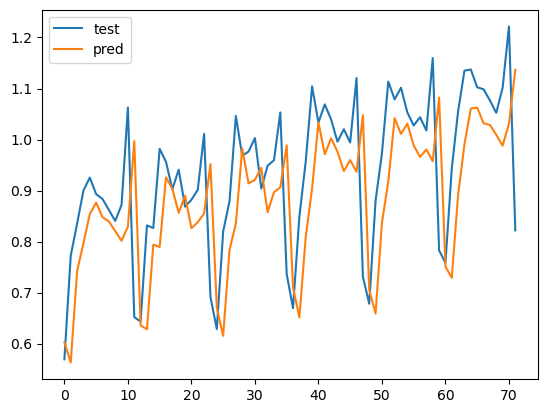

In [29]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['test', 'pred'])

### Recurrent predictor

In [30]:
from tensorflow.keras.layers import LSTM

In [31]:
X_train.shape

(239, 1)

In [32]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [33]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [34]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 192       
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 199 (796.00 Byte)
Trainable params: 199 (796.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
239/239 [==============================] - 2s 2ms/step - loss: 0.0944
Epoch 2/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 3/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 4/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 5/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 6/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 7/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 8/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 9/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 10/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 11/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 12/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 12: ear

3/3 [==============================] - 0s 3ms/step


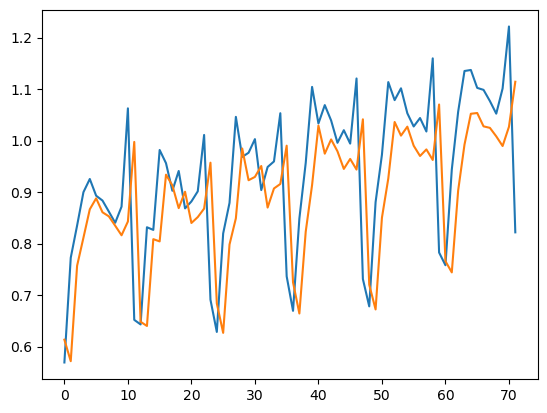

In [37]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

## Windows

In [45]:
train_sc.shape

(240, 1)

In [38]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [39]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [40]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [41]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [42]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [43]:
X_train.shape

(228, 12)

In [44]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

### Fully Connected on Windows

In [45]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/200
228/228 [==============================] - 1s 1ms/step - loss: 0.0220
Epoch 2/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 3/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 4/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 5/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 6/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 8/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 9/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 10/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 11/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 12/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 13/200


2/2 [==============================] - 0s 2ms/step


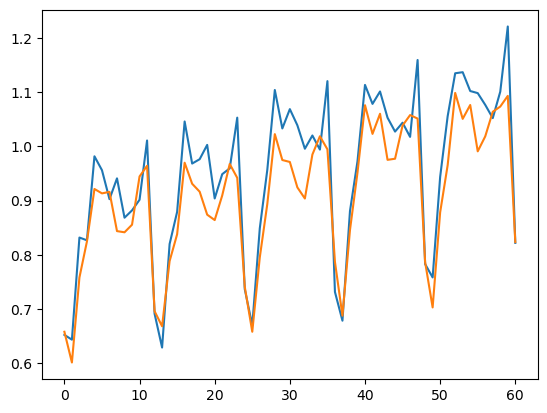

In [47]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

### LSTM on Windows

In [48]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [49]:
X_train_t.shape

(228, 1, 12)

In [50]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 456       
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 463 (1.81 KB)
Trainable params: 463 (1.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 2s 2ms/step - loss: 0.0497
Epoch 2/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 3/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 4/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 5/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 6/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 7/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 8/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 9/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 12/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 13/100


2/2 [==============================] - 0s 2ms/step


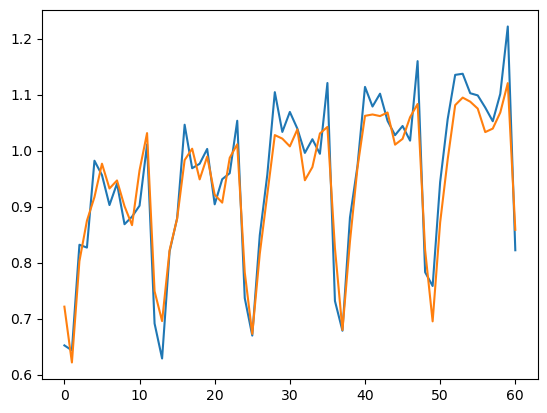

In [53]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

## Exercise 1

In the model above we reshaped the input shape to: `(num_samples, 1, 12)`, i.e. we treated a window of 12 months as a vector of 12 coordinates that we simultaneously passed to all the LSTM nodes. An alternative way to look at the problem is to reshape the input to `(num_samples, 12, 1)`. This means we consider each input window as a sequence of 12 values that we will pass in sequence to the LSTM. In principle this looks like a more accurate description of our situation. But does it yield better predictions? Let's check it.

- Reshape `X_train` and `X_test` so that they represent a set of univariate sequences
- retrain the same LSTM(6) model, you'll have to adapt the `input_shape`
- check the performance of this new model, is it better at predicting the test data?

## Exercise 2

RNN models can be applied to images too. In general we can apply them to any data where there's a connnection between nearby units. Let's see how we can easily build a model that works with images.

- Load the MNIST data, by now you should be able to do it blindfolded :)
- reshape it so that an image looks like a long sequence of pixels
- create a recurrent model and train it on the training data
- how does it perform compared to a fully connected? How does it compare to Convolutional Neural Networks?

(feel free to run this exercise on a cloud GPU if it's too slow on your laptop)